In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys, os, logging, timeit, glob
from pathlib import Path as Pathlb


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import itertools

import seaborn as sns

import matplotlib.pyplot as plt

from statannot import add_stat_annotation

plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

In [35]:
# e = pd.read_excel(f'C:\\Project\\master-project\\results\\results\\Result__All.xlsx')
e = pd.read_excel(f'C:\Project\master-project\\results\pk_all.xlsx')
# e = e.drop(columns=['Unnamed: 0'])



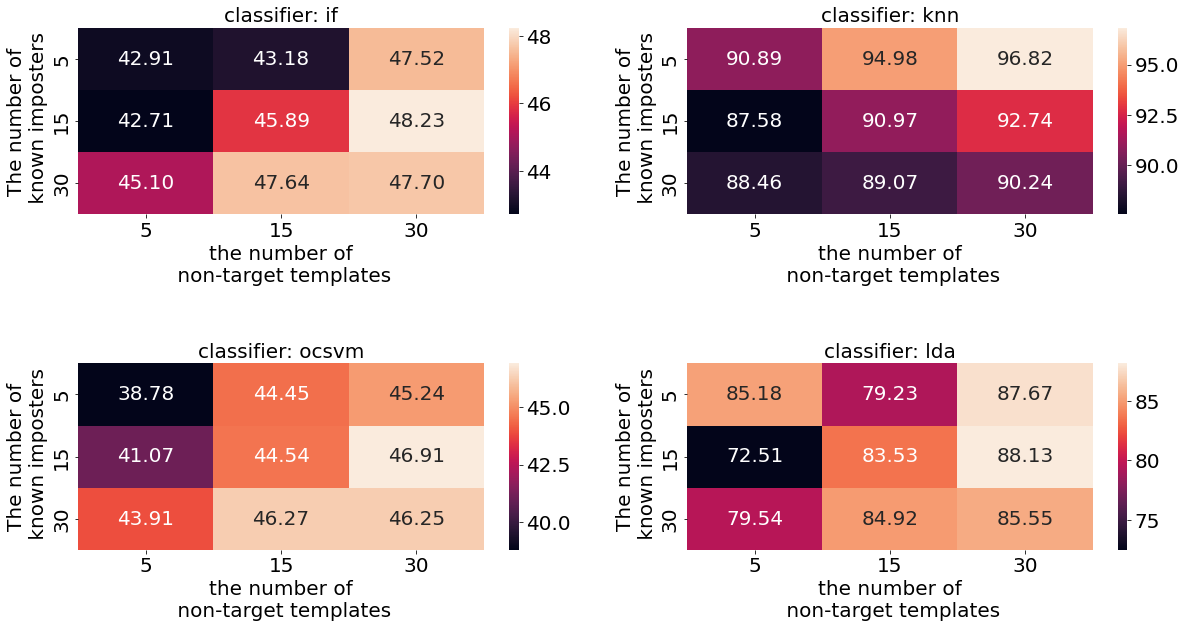

In [49]:
a = e.groupby(['classifier_name', 'known_imposter', 'min_number_of_sample']).mean()
# plt.plot(a.unstack().loc[c,b], label=labels, marker='o')
# AUS_All, 
# c = 'BACC_ud'
# a.unstack().loc[:, c].plot(figsize=(20,10))
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.8, top=0.85,) 

for idx, i in enumerate(['if', 'knn', 'ocsvm', 'lda']):
    plt.subplot(2,2,idx+1)
    # title = ["BACC on balanced test (with 10-fold CV)",  "BACC on unbalanced test", "ACC on unbalanced test"]
    plt.title(f"classifier: {i}")
    sns.heatmap(a.unstack().loc[i, 'ACC_ud'], annot=True, fmt=".2f")
    plt.ylabel("The number of\n known imposters")
    plt.xlabel("the number of\n non-target templates")




Text(0.5, 0, 'Known Imposters')

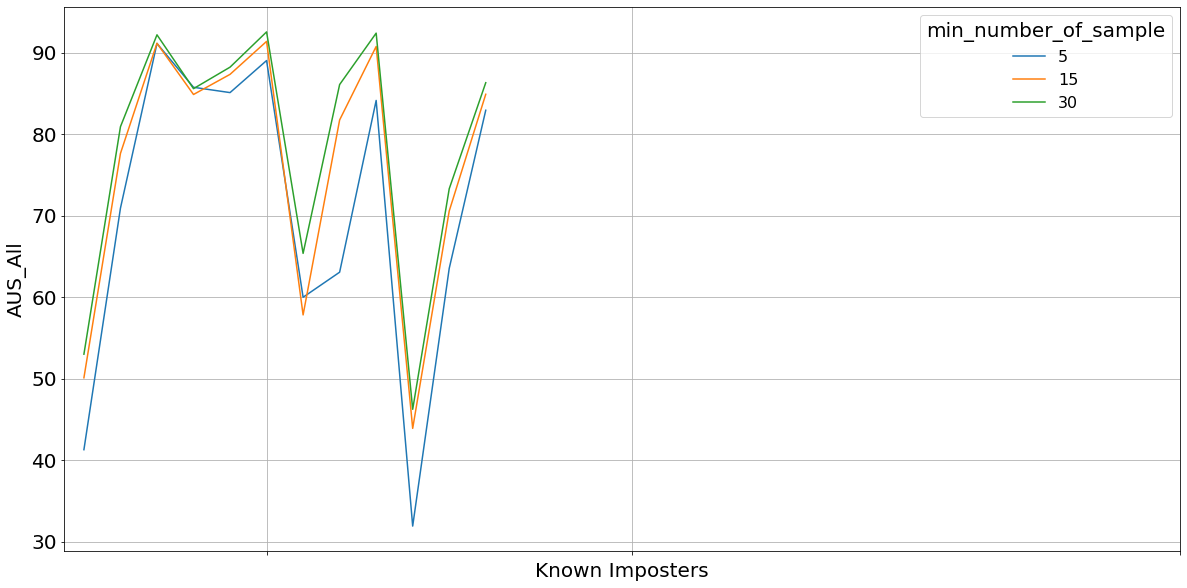

In [50]:
a = e.groupby(['classifier_name', 'known_imposter', 'min_number_of_sample']).mean()
# plt.plot(a.unstack().loc[c,b], label=labels, marker='o')
# AUS_All, 
c = 'AUS_All'
a.unstack().loc[:, c].plot(figsize=(20,10))

plt.grid(True)
plt.xticks(ticks=[5, 15, 30])
plt.ylabel(c)
plt.xlabel('Known Imposters')


In [6]:
#    'EER', 
#    'ACC_ud', 'BACC_ud', 'FAR_ud', 'FRR_ud', ',
#    'unknown_imposter_samples', 'AUS_All', 'FAU_All', 'CM_bd_TN',
#    'CM_bd_FP', 'CM_bd_FN', 'CM_bd_TP', 'CM_ud_TN', 'CM_ud_FP', 'CM_ud_FN', 'CM_ud_TP',hue="Accuracy",
X="AUS_All"
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Method", hue="classifier_name", y=X, data=e, showmeans=True, 
                    meanprops={ "marker":"o",
                                "markerfacecolor":"white", 
                                "markeredgecolor":"black",
                                "markersize":"15"})
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
                        
# plt.ylabel('balanced Accuracy', fontsize=20)
# ax = sns.swarmplot(x="Subject ID", y=X, data=e, color=".25", size=15)

# plt.ylabel('Balanced Accuracy', fontsize=20)

box_pairs=[
    (('Method_3', 'knn'), ('Method_2', 'knn')),
    (('Method_3', 'knn'), ('end to end', 'e2e')),    
    (('end to end', 'e2e'), ('Method_2', 'knn')),    
]

add_stat_annotation(ax, data=e, y=X, x="Method", hue="classifier_name",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)  



ValueError: Could not interpret input 'Method'

<Figure size 1440x720 with 0 Axes>